# Display dynamics results from stable Ilic: $\bar{w}=2$, $v_f/c<10 \%$

## Import packages

In [1]:
import sys
sys.path.append("../")
import numpy as np
import pickle
import matplotlib.pyplot as plt
from Grating_and_parameters.parameters import Parameters, D1_ND
from Grating_and_parameters.twobox import TwoBox
import pickle
I, L, m, c = Parameters()

## Import data

In [2]:
# (1): case a 
# (2): case b
runID = 1
I_string = "10G"
pkl_fname = f'./Integrators/Data/Ilic-10/Dynamics_run{runID}_I{I_string}.pkl'
Envelope = False # For eigenvector initial conditions 
Jacobian = False

In [3]:
with open(pkl_fname, 'rb') as data_file:
    data = pickle.load(data_file)

timeL = data['timeL']
timeM = data['timeM']

YL = data['YL']
x = YL[0]
y = YL[1]
vx = YL[2]
vy = YL[3]
phiM = data['phiM']
phidotM = data['phidot']

eps = data['eps']
epsdot = data['epsdot']

## Build grating (for linear model)

In [4]:
grating_type = "Ilic"

wavelength      = 1.5 
grating_pitch   = 1.8 / wavelength
grating_depth   = 0.5 / wavelength
box1_width      = 0.15 * grating_pitch
box2_width      = 0.35 * grating_pitch
box_centre_dist = 0.60 * grating_pitch
box1_eps        = 3.5**2 
box2_eps        = 3.5**2
gaussian_width  = 2 * 10
substrate_depth = 0.5 / wavelength
substrate_eps   = 1.45**2

wavelength      = 1.
angle           = 0.
Nx              = 100
numG            = 25
Qabs            = np.inf

grating = TwoBox(grating_pitch, grating_depth, box1_width, box2_width, box_centre_dist, box1_eps, box2_eps, 
                 gaussian_width, substrate_depth, substrate_eps,
                 wavelength, angle, Nx, numG, Qabs)

In [5]:
# data['Stopped']
# data['duration (min)']
# 100*vx[-1]/c
# timeL[-1]
x0_dyn = data['Initial']
h = data['step']
# I_dyn = data['Intensity']
I_dyn = 10e9

In [6]:
## Truncate
t_start = 0
# t_end = 0.438 - for short timescale in case (a)
t_end = timeL[-1000] # (a): timeL[-1000]  #40 #69.75 #timeL[-1]
x_trunc = x[(timeL>t_start) & (timeL<=t_end)]
y_trunc = y[(timeL>t_start) & (timeL<=t_end)]
vx_trunc = vx[(timeL>t_start) & (timeL<=t_end)]
vy_trunc = vy[(timeL>t_start) & (timeL<=t_end)]
phiM_trunc = phiM[(timeM>t_start) & (timeM<=t_end)]
phidotM_trunc = phidotM[(timeM>t_start) & (timeM<=t_end)]

timeMeps=timeM[0:-1]
timeM_trunc = timeM[(timeM>t_start) & (timeM<=t_end)]
timeMeps_trunc = timeMeps[(timeMeps>t_start) & (timeMeps<=t_end)]

eps_trunc = eps[(timeMeps>t_start) & (timeMeps<=t_end)]
epsdot_trunc = epsdot[(timeMeps>t_start) & (timeMeps<=t_end)]

timeL_trunc = timeL[(timeL>t_start) & (timeL<=t_end)]

In [120]:
print( y[timeL==timeL[-1000]]*100/L )
print(timeL[-600])

[-11.44387204]
120.22542808177137


## Colours

## 

In [7]:
colorX="black"   
colorvX="xkcd:pine green"

colorY="blue"
colorvY= "mediumorchid" #dodgerblue"  #cornflowerblue

colorphi="red"  #"royalblue"
colorvphi= "mediumseagreen" #"tomato"  #coral

colorRotate="darkgreen"
colorRotateRate="seagreen"

dpi = 300

In [23]:
### Imports ### 
from matplotlib.ticker import Locator
class MinorSymLogLocator(Locator):
    """
    Dynamically find minor tick positions based on the positions of
    major ticks for a symlog scaling.
    """
    def __init__(self, linthresh):
        """
        Ticks will be placed between the major ticks.
        The placement is linear for x between -linthresh and linthresh,
        otherwise its logarithmically
        """
        self.linthresh = linthresh

    def __call__(self):
        'Return the locations of the ticks'
        majorlocs = self.axis.get_majorticklocs()

        # iterate through minor locs
        minorlocs = []

        # handle the lowest part
        for i in range(1, len(majorlocs)):
            majorstep = majorlocs[i] - majorlocs[i-1]
            if abs(majorlocs[i-1] + majorstep/2) < self.linthresh:
                ndivs = 10
            else:
                ndivs = 9
            minorstep = majorstep / ndivs
            locs = np.arange(majorlocs[i-1], majorlocs[i], minorstep)[1:]
            minorlocs.extend(locs)

        return self.raise_if_exceeds(np.array(minorlocs))

    def tick_values(self, vmin, vmax):
        raise NotImplementedError('Cannot get tick locations for a '
                                  '%s type.' % type(self))
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('text.latex', preamble=r'\usepackage{amsmath, amssymb, physics, amsfonts, siunitx}')

def set_size(w,h, ax=None):
    """
    w, h: width, height in inches 
    From somewhere (I'm not sure)
    """
    if not ax: ax=plt.gca()
    l = ax.figure.subplotpars.left
    r = ax.figure.subplotpars.right
    t = ax.figure.subplotpars.top
    b = ax.figure.subplotpars.bottom
    figw = float(w)/(r-l)
    figh = float(h)/(t-b)
    ax.figure.set_size_inches(figw, figh)

## Plot Case (a) - short timescale

In [ ]:
LabelSize = 15
fig,ax1=plt.subplots()

## y
ax1.plot(timeL_trunc, 100*y_trunc/L, color=colorY)
ax1.set_xlabel("$t$ (s)",fontsize=LabelSize)
ax1.set_ylabel(ylabel=r"$y/L' \,(\%)$",fontsize=LabelSize,color=colorY) 

ax1.set_xlim(0,timeL_trunc[-1])
ax1.set_ylim(-10,10)

ax1.tick_params(labelsize=15)
ax1.tick_params(axis="y",labelcolor=colorY, color=colorY)
ax1.set_yticks([-10,-5,0,5,10],
               labels=["$-10$","$-5$","$0$","$5$","$10$"])

vxticks=[0,0.1,0.2,0.3,0.4]    
## vx
ax1vx=ax1.twiny()
ax1vx.set_xlim(ax1.get_xlim())
ax1vx.set_xticks(vxticks)
ax1vx.set_xticklabels(["$0$","$0.007$","$0.014$","$0.022$","$0.029$"])
ax1vx.set_title("$v_x/c$ (\%)",fontsize=LabelSize,pad=10)
ax1vx.tick_params(labelsize=15)

## phi
ax2=ax1.twinx()
ax2.plot(timeM_trunc,np.tan(phiM_trunc)*100,color=colorphi)
ax2.set_ylabel("$\\tan(\phi\,')$ (\%)",fontsize=LabelSize,color=colorphi) 
ax2.set_xlim(0,timeM_trunc[-1])
ax2.set_ylim(-5,5)
ax2.tick_params(labelsize=15)
ax2.tick_params(axis="y",labelcolor=colorphi, color=colorphi)

t=ax2.get_xlim()
ax1.hlines(-5,t[0],t[1],linestyle="dashed",color='k',alpha=0.3)
ax1.hlines( 5,t[0],t[1],linestyle="dashed",color='k',alpha=0.3)
ax2.set_xlim(t)

fig.tight_layout()
set_size(6/1.5,5/1.5)

dpi = 600
plt.savefig(rf"./Integrators/Data/Ilic-10/Images/Ilic_case_a_compare_dpi{dpi}.jpeg", format="jpeg", dpi=dpi, bbox_inches='tight')
plt.close(fig)


## Dynamics $[(x,v_x), (y, v_y), (\phi',\dot{\phi}')]$ - NO $\xi$ data displayed

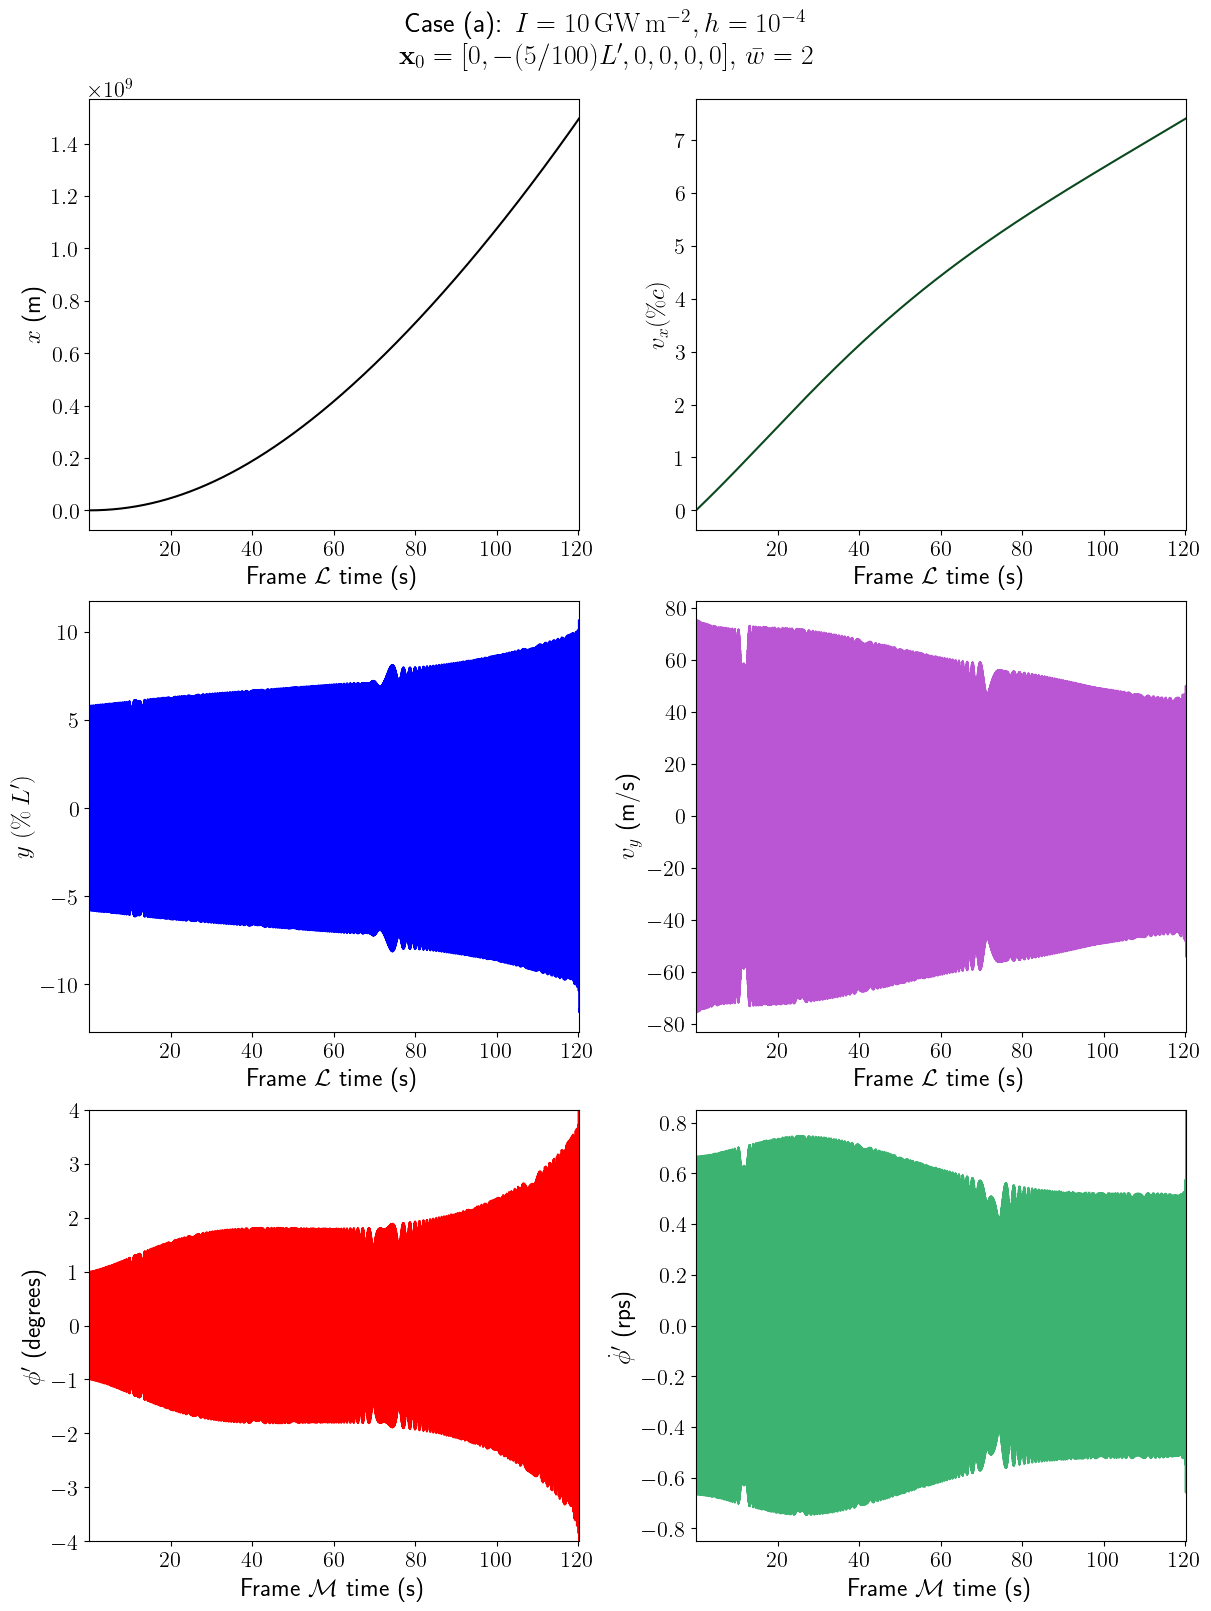

In [9]:
fig, axd = plt.subplot_mosaic(
    [
        ["ax1a","ax1b"],
        ["ax2a","ax2b"],
        ["ax3a","ax3b"],
    ],
    empty_sentinel="BLANK",
    constrained_layout=True
)
ax1a=axd['ax1a'];       ax1b=axd['ax1b']
ax2a=axd['ax2a'];       ax2b=axd['ax2b']
ax3a=axd['ax3a'];       ax3b=axd['ax3b']

scale = 0.8
fig.set_size_inches(scale*15, scale*20)

############
## x, vx
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)",  ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
## y, vy
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
## phi ,vphi
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")
if runID==1:
    ax3a.set_ylim(-4,4)
    ax3b.set_ylim(-0.85,0.85)

# fig.suptitle(rf"{grating_type} grating from $5.3 \%c$, runID = {runID}")
# fig.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
#              y=0.95)

dpi = 300
if runID == 1:
    fig.suptitle(rf"Case (a): " r"$I=10\,\unit{\giga\watt\per\metre\squared}, h=10^{-4}$" "\n" r"$\vb{x}_0=[0, -(5/100)L', 0, 0, 0, 0], \, \bar{w}=2$")
    # plt.savefig(rf"./Images/Ilic_case_a_dpi{dpi}.jpeg",format="jpeg",dpi=dpi,bbox_inches='tight')
if runID == 2:
    fig.suptitle(rf"Case (b): " r"$I=10\,\unit{\giga\watt\per\metre\squared}, h=10^{-4}$" "\n" r"$\vb{x}_0=[0, -(50/100)L', -10\% \, \text{tilt}, 0, 0, 0], \, \bar{w}=2$")
    # plt.savefig(rf"./Images/Ilic_case_b_trunc_dpi{dpi}.jpeg",format="jpeg",dpi=dpi,bbox_inches='tight')
    
# plt.close(fig)

# fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
# dummy4.axis('off')

# if not Jacobian:
#     ax4a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
#     ax4a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     ax4b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
#     ax4b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     # ax4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
#     ax4a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
#     ax4b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

#     # fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
#     fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
#                 y=1.05)
    

## Fitting $t = t(\beta)$

In [13]:
from scipy.optimize import curve_fit
## Define function to map t = t(beta)
def func(x,a,b,c,d,e):
    """
    "x": vx/c
    """
    return a*x**4 + b*x**3 + c*x**2 + d*x + e
popt, pcov = curve_fit(func, vx_trunc/c, timeL_trunc)
a_fit = popt[0]
b_fit = popt[1]
c_fit = popt[2]
d_fit = popt[3]
e_fit = popt[4]
def v_to_t(v):
    return func(v,a_fit, b_fit, c_fit, d_fit, e_fit)

## Fitting $\beta = \beta(t)$

In [14]:
popt2,pcov2 = curve_fit(func, timeL_trunc, vx_trunc/c)
a_fit2 = popt2[0]
b_fit2 = popt2[1]
c_fit2 = popt2[2]
d_fit2 = popt2[3]
e_fit2 = popt2[4]
def t_to_v(t):
    return func(t,a_fit2, b_fit2, c_fit2, d_fit2, e_fit2)

## Collect $\xi$ and $\vec{v}_{\xi}$

In [15]:
## Calculate data for eigenvalues
final_speed = 6.8
num_points = 300
wavelength_range = np.linspace(1, 1/D1_ND(final_speed/100), num_points)

extra = np.linspace(1/D1_ND(5.25/100), 1/D1_ND(5.75/100), 100)
wavelength_range = np.sort( np.append(wavelength_range,extra) )

num_points = len(wavelength_range)
from numpy.linalg import norm as norm

####################
## Build arrays

## Q arrays
Q1 = np.zeros(num_points)
Q2 = np.zeros(num_points)

## Restoring arrays
kyy = np.zeros(num_points)
kyphi = np.zeros(num_points)
kphiy = np.zeros(num_points)
kphiphi = np.zeros(num_points)

## Damping arrays
muyy = np.zeros(num_points)
muyphi = np.zeros(num_points)
muphiy = np.zeros(num_points)
muphiphi = np.zeros(num_points)

## Eigenvalue arrays
real1 = np.zeros(num_points)
real2 = np.zeros(num_points)
real3 = np.zeros(num_points)
real4 = np.zeros(num_points)
imag1 = np.zeros(num_points)
imag2 = np.zeros(num_points)
imag3 = np.zeros(num_points)
imag4 = np.zeros(num_points)

EIG = 0j*np.zeros( (num_points, 4) )
VEC = 0j*np.zeros( (num_points, 4, 4) )

vec1_mod = np.zeros( (4,num_points) )
vec2_mod = np.zeros( (4,num_points) )
vec3_mod = np.zeros( (4,num_points) )
vec4_mod = np.zeros( (4,num_points) )

## Calculate data
for i in range(num_points):
    wavelength = wavelength_range[i]
    Qs_array, rest_array, damp_array, real_array, imag_array, vec_array = grating.Linear_info_new(wavelength, I_dyn)
    ## Save to arrays
    Q1[i] = Qs_array[0];        Q2[i] = Qs_array[1]
    kyy[i] = rest_array[0];     kyphi[i] = rest_array[1];       kphiy[i] = rest_array[2];       kphiphi[i] = rest_array[3]
    muyy[i] = damp_array[0];    muyphi[i] = damp_array[1];      muphiy[i] = damp_array[2];      muphiphi[i] = damp_array[3]
    real1[i] = real_array[0];   real2[i] = real_array[1];       real3[i] = real_array[2];       real4[i] = real_array[3]
    imag1[i] = imag_array[0];   imag2[i] = imag_array[1];       imag3[i] = imag_array[2];       imag4[i] = imag_array[3]

    EIG[i] = real_array + 1j * imag_array
    VEC[i] = vec_array

    ## Extract (normalised) components of eigenvectors
    vec1    =   vec_array[:,0]
    vec2    =   vec_array[:,1]
    vec3    =   vec_array[:,2]
    vec4    =   vec_array[:,3]
    # vec1, vec2, vec3, vec4 = vec_array
    vec1_mod[:,i] = np.abs(vec1)/norm(vec1)
    vec2_mod[:,i] = np.abs(vec2)/norm(vec2)
    vec3_mod[:,i] = np.abs(vec3)/norm(vec3)
    vec4_mod[:,i] = np.abs(vec4)/norm(vec4)

wavelength_minmax = [1, 1/D1_ND(final_speed/100)]

## Convert wavelength to velocity
v = np.zeros(num_points)
for i in range(num_points):
    D = 1/wavelength_range[i]
    v[i] = (1-D**2)/(1+D**2)


## Sort $\mathfrak{Re}(\xi)$, $\mathfrak{Im}(\xi)$ and $\vec{v}_{\xi}$ for plotting

In [25]:
## Sort real and imaginary eigenvalues 
## (just for plotting - real[i] and imag[i] will not necessarily coincide)
sorted_eigenvalues_array = np.zeros_like(EIG, dtype=np.complex128)
sorted_real_array = np.zeros_like(EIG,dtype=np.float64)
sorted_imag_array = np.zeros_like(EIG,dtype=np.float64)
sorted_eigenvectors_array = np.zeros_like(VEC, dtype=np.complex128)

vec1_mod_sort = np.zeros( (4,num_points) )
vec2_mod_sort = np.zeros( (4,num_points) )
vec3_mod_sort = np.zeros( (4,num_points) )
vec4_mod_sort = np.zeros( (4,num_points) )

for i in range(num_points):
    # if (v[i]>=14.25) and (v[i]<=14.5):
    #     sort_indices = np.argsort(np.real(REAL[i]))
    # else:
    sort_indices_real = np.argsort(np.imag(EIG[i]))  # Get sorting order based on real
    sort_indices_imag = np.argsort(np.imag(EIG[i]))  # Get sorting order based on real

    sorted_real_array[i] = np.real(EIG)[i][sort_indices_real]
    sorted_imag_array[i] = np.imag(EIG)[i][sort_indices_imag]
    
    # sorted_eigenvalues_array[i] = E[i][sort_indices]  # Sort eigenvalues

    sorted_eigenvectors_array[i] = VEC[i][:, sort_indices_imag]  # Sort corresponding eigenvectors
    
    vec1_mod_sort[:,i] = np.abs(sorted_eigenvectors_array[i][:,0])/norm(sorted_eigenvectors_array[i][:,0])
    vec2_mod_sort[:,i] = np.abs(sorted_eigenvectors_array[i][:,1])/norm(sorted_eigenvectors_array[i][:,1])
    vec3_mod_sort[:,i] = np.abs(sorted_eigenvectors_array[i][:,2])/norm(sorted_eigenvectors_array[i][:,2])
    vec4_mod_sort[:,i] = np.abs(sorted_eigenvectors_array[i][:,3])/norm(sorted_eigenvectors_array[i][:,3])

## For plotting
real1_sort = sorted_real_array[:,0]
real2_sort = sorted_real_array[:,1]
real3_sort = sorted_real_array[:,2]
real4_sort = sorted_real_array[:,3]

imag1_sort = sorted_imag_array[:,0]
imag2_sort = sorted_imag_array[:,1]
imag3_sort = sorted_imag_array[:,2]
imag4_sort = sorted_imag_array[:,3]


## Truncate all linear stability for plotting

In [28]:
## Convert eigenvalue/vector v array to time - truncate eigenvlues, vectors
time_eigs_og = v_to_t(v)
time_index = (time_eigs_og>t_start) & (time_eigs_og<=t_end)
time_eigs = time_eigs_og[ time_index ]

v_trunc = v[ time_index ]
real1_sort_trunc = real1_sort[ time_index ]
real2_sort_trunc = real2_sort[ time_index ]
real3_sort_trunc = real3_sort[ time_index ]
real4_sort_trunc = real4_sort[ time_index ]

imag1_sort_trunc = imag1_sort[ time_index ]
imag2_sort_trunc = imag2_sort[ time_index ]
imag3_sort_trunc = imag3_sort[ time_index ]
imag4_sort_trunc = imag4_sort[ time_index ]

vec1_mod_sort_trunc = vec1_mod_sort[:, time_index]
vec2_mod_sort_trunc = vec2_mod_sort[:, time_index]

kyy_trunc       = kyy[      time_index ]
kyphi_trunc     = kyphi[    time_index ]
kphiy_trunc     = kphiy[    time_index ]
kphiphi_trunc   = kphiphi[  time_index ]
muyy_trunc      = muyy[     time_index ]
muyphi_trunc    = muyphi[   time_index ]
muphiy_trunc    = muphiy[   time_index ]
muphiphi_trunc  = muphiphi[ time_index ]

## Dynamics $[(\mathfrak{Re}(\xi),\mathfrak{Im}(\xi)), (\vec{v}_{\xi}, \vec{v}_{\xi}),  (y, v_y), (\phi',\dot{\phi}')]$ - Eigenvalue lines between plots *should* match - need to confirm

Text(0.5, 0.98, 'DYNAMICS: Ilic grating, $I_0$=1.0E+10, $h=$0.0001\n$\\vb{x}_0=$[0.0, -5.00E-01, 0.00E+00, 0.0, 0.00E+00, 0.00E+00]')

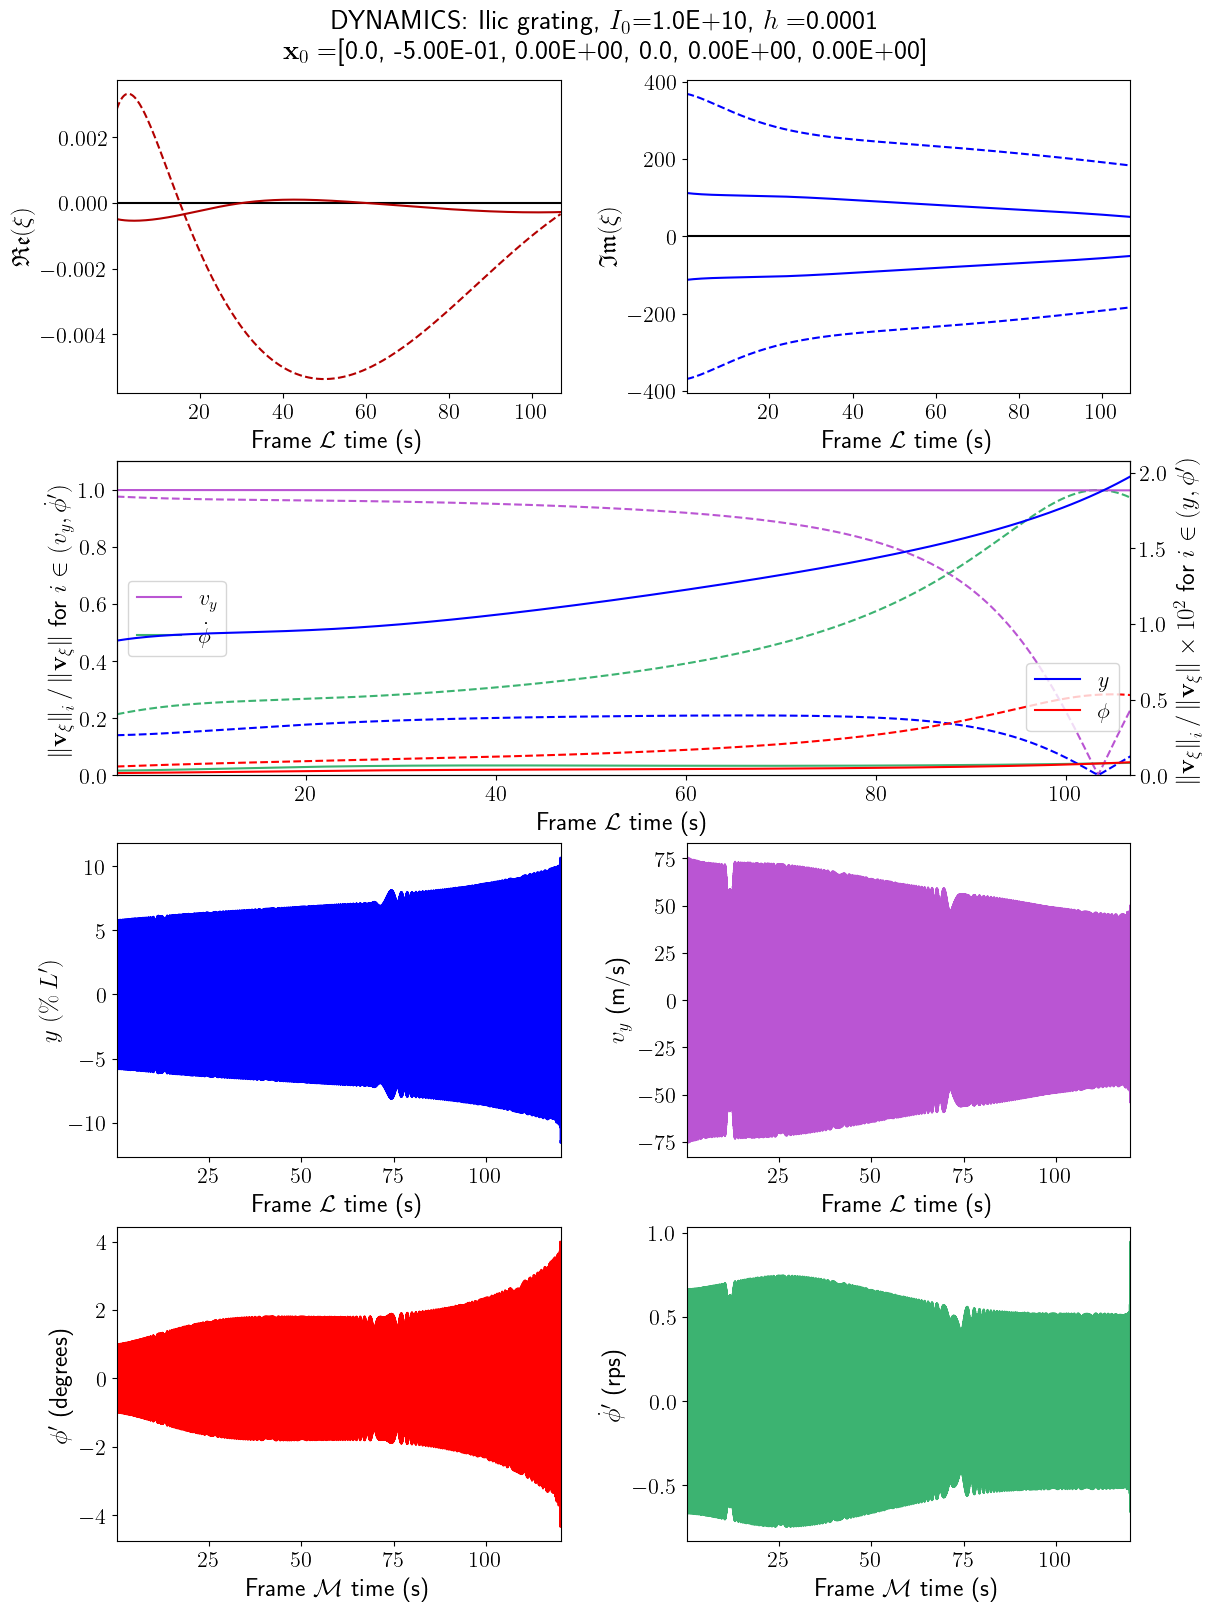

In [ ]:
## Convert eigenvalue/vector v array to time
marker_damp = '--'
dpi = 300

colorY2     = colorY        #"blue"
colorvY2    = colorvY       #"red"  #cornflowerblue

colorphi2   = colorphi      # "black"  #"royalblue"
colorvphi2  = colorvphi     # "lightgreen"  #coral

############################
fig, axd = plt.subplot_mosaic(
    [
        ["ax1a","ax1b"],
        ["ax2", "ax2"],
        ["ax3a","ax3b"],
        ["ax4a","ax4b"]
    ],
    empty_sentinel="BLANK",
    # width_ratios=[1, 0.0, 1],
    constrained_layout=True
)
scale = 0.8
fig.set_size_inches(scale*15, scale*20)

############
## Plot eigs vs wavelength ##
marker_size = 2
colorReal=(0.7, 0, 0)
axd['ax1a'].hlines(0,time_eigs[0],time_eigs[-1], 'black' )
axd['ax1a'].plot(time_eigs,real1_sort_trunc, marker_damp, markersize=marker_size, color=colorReal)
# axd['ax1a'].plot(time_eigs,real2_sort_trunc, '-', markersize=marker_size, color=colorReal)
axd['ax1a'].plot(time_eigs,real3_sort_trunc, '-', markersize=marker_size, color=colorReal)
# axd['ax1a'].plot(time_eigs,real4_sort_trunc, '-', markersize=marker_size, color=colorReal)

colorImag= 'blue'
axd['ax1b'].hlines(0,time_eigs[0],time_eigs[-1], 'black' )
axd['ax1b'].plot(time_eigs,imag1_sort_trunc, marker_damp, markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag2_sort_trunc, '-', markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag3_sort_trunc, '-', markersize=marker_size, color=colorImag)
axd['ax1b'].plot(time_eigs,imag4_sort_trunc, marker_damp, markersize=marker_size, color=colorImag)

# ax1b.yaxis.tick_right()
# ax1b.yaxis.set_label_position("right")
axd['ax1a'].set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=r"$\mathfrak{Re}(\xi)$")
axd['ax1b'].set(xlim=(time_eigs[0],time_eigs[-1]), xlabel="Frame $\mathcal{L}$ time (s)", ylabel=r"$\mathfrak{Im}(\xi)$") 

###########
## Plot eigenvectors
import mpl_axes_aligner
marker = '-'
## Plots

# velocities
line3, = axd['ax2'].plot(   time_eigs,vec1_mod_sort_trunc[2], marker_damp, markersize=0.5, label=r"$v_y$", color=colorvY2)
line4, = axd['ax2'].plot(   time_eigs,vec1_mod_sort_trunc[3], marker_damp, markersize=0.5, label=r"$\dot{\phi}$", color=colorvphi2)
axd['ax2'].plot(            time_eigs,vec2_mod_sort_trunc[2], marker, markersize=0.5, color=colorvY2)
axd['ax2'].plot(            time_eigs,vec2_mod_sort_trunc[3], marker, markersize=0.5, color=colorvphi2)

# displacements
ax2b = axd['ax2'].twinx()

line1, = ax2b.plot(         time_eigs,vec1_mod_sort_trunc[0]*1e2, marker_damp, markersize=0.5, label=r"$y$", color=colorY2)
line2, = ax2b.plot(         time_eigs,vec1_mod_sort_trunc[1]*1e2, marker_damp, markersize=0.5, label=r"$\phi$", color=colorphi2)
ax2b.plot(                  time_eigs,vec2_mod_sort_trunc[0]*1e2, marker, markersize=0.5, color=colorY2)
ax2b.plot(                  time_eigs,vec2_mod_sort_trunc[1]*1e2, marker, markersize=0.5, color=colorphi2)


# axd['ax2'].plot(time_eigs,vec3_mod_sort[0], marker, markersize=0.5, color=colorY2)
# axd['ax2'].plot(time_eigs,vec3_mod_sort[1], marker, markersize=0.5, color=colorphi2)
# axd['ax2'].plot(time_eigs,vec3_mod_sort[2], marker, markersize=0.5, color=colorvY2)
# axd['ax2'].plot(time_eigs,vec3_mod_sort[3], marker, markersize=0.5, color=colorvphi2)

# axd['ax2'].plot(time_eigs,vec4_mod_sort[0], marker, markersize=0.5, color=colorY2)
# axd['ax2'].plot(time_eigs,vec4_mod_sort[1], marker, markersize=0.5, color=colorphi2)
# axd['ax2'].plot(time_eigs,vec4_mod_sort[2], marker, markersize=0.5, color=colorvY2)
# axd['ax2'].plot(time_eigs,vec4_mod_sort[3], marker, markersize=0.5, color=colorvphi2)

axd['ax2'].set(xlim=(time_eigs[0],time_eigs[-1]),ylim=(0,1.1))
ax2b.set_ylim(bottom=0)
# ax1.set_xticks([0,1,2,2.7])
from matplotlib.legend_handler import HandlerLine2D
legend = axd['ax2'].legend(handler_map={
    line3: HandlerLine2D(numpoints=1),
    line4: HandlerLine2D(numpoints=1) })
for legend_handle in legend.legend_handles:
    legend_handle.set_linestyle('-')

legend2 = ax2b.legend(handler_map={
    line1: HandlerLine2D(numpoints=1),
    line2: HandlerLine2D(numpoints=1),
    })
for legend_handle in legend2.legend_handles:
    legend_handle.set_linestyle('-')
legend2.set_loc("center right")
legend2.set_bbox_to_anchor((0.5, 0., 0.5, 0.5))

## Labels
axd['ax2'].set(xlabel="Frame $\mathcal{L}$ time (s)",   ylabel=r"$\norm{\vb{v}_{\xi}}_i \, / \, \norm{\vb{v}_{\xi}}$ for $i\in(v_y, \dot{\phi}')$")
ax2b.set(                                               ylabel=r"$\norm{\vb{v}_{\xi}}_i \, / \, \norm{\vb{v}_{\xi}} \times 10^2$  for $i\in(y, \phi')$" )

# mpl_axes_aligner.align.yaxes(axd['ax2'], 0, ax2b, 0, 0.2)

############
## Plot y and vy
axd['ax3a'].plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
axd['ax3a'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax3b'].plot(timeL_trunc, vy_trunc, color=colorvY)
axd['ax3b'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax3a'].set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
axd['ax3b'].set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
## Plot phi and vphi
axd['ax4a'].plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
axd['ax4a'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax4b'].plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
axd['ax4b'].set_xlim(timeL_trunc[0],timeL_trunc[-1])
axd['ax4a'].set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
axd['ax4b'].set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

fig.suptitle(rf"DYNAMICS: {grating_type} grating, $I_0$={I_dyn:.1E}, $h=${h}" "\n" r"$\vb{x}_0=$"rf"[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]")

# fig2, (ax4a, dummy4, ax4b) = plt.subplots(nrows=1, ncols=3, width_ratios=(1,0.1,1), figsize=(18,6))
# dummy4.axis('off')

# if not Jacobian:
#     ax5a.plot(timeMeps_trunc, (180/np.pi)*eps_trunc, color=colorRotate)
#     ax5a.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     ax5b.plot(timeMeps_trunc, epsdot_trunc, color=colorRotateRate)
#     ax5b.set_xlim(timeMeps_trunc[0],timeMeps_trunc[-1])
#     # 5x4b.plot(timeM[0:-1], np.gradient(eps,timeM[0:-1]), color="red", linestyle="dotted")
#     ax5a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\\varepsilon$ (degrees)")
#     ax5b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\\varepsilon}$")

#     # fig2.suptitle(rf"{grating_type} grating from $5.3 \% c$, runID = {runID}")
#     fig2.suptitle(rf"DYNAMICS: {grating_type} grating, I={I_dyn:.1E}, h={h}" "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]", 
#                 y=1.05)

# if runID==1:
#     plt.savefig("Ilic_strong_damp_dynamics.jpeg",format="jpeg",dpi=dpi,bbox_inches='tight')
# if runID==2:
#     plt.savefig("Ilic_weak_damp_dynamics.jpeg",format="jpeg",dpi=dpi,bbox_inches='tight')
# plt.close(fig)


## Matching eigenvalues and vectors

In [19]:
grating.wavelength = 1.
real_v0, imag_v0, vec_v0 = grating.Eigs(I_dyn,m,c,'grad',False,True)
print(real_v0)
print(imag_v0)
print(np.abs(vec_v0[:,0]))

[ 0.00271392  0.00271392 -0.00048213 -0.00048213]
[ 369.52252237 -369.52252237  112.73351205 -112.73351205]
[2.64502973e-03 5.72062430e-04 9.77398058e-01 2.11389952e-01]


## Restoring and damping terms over time

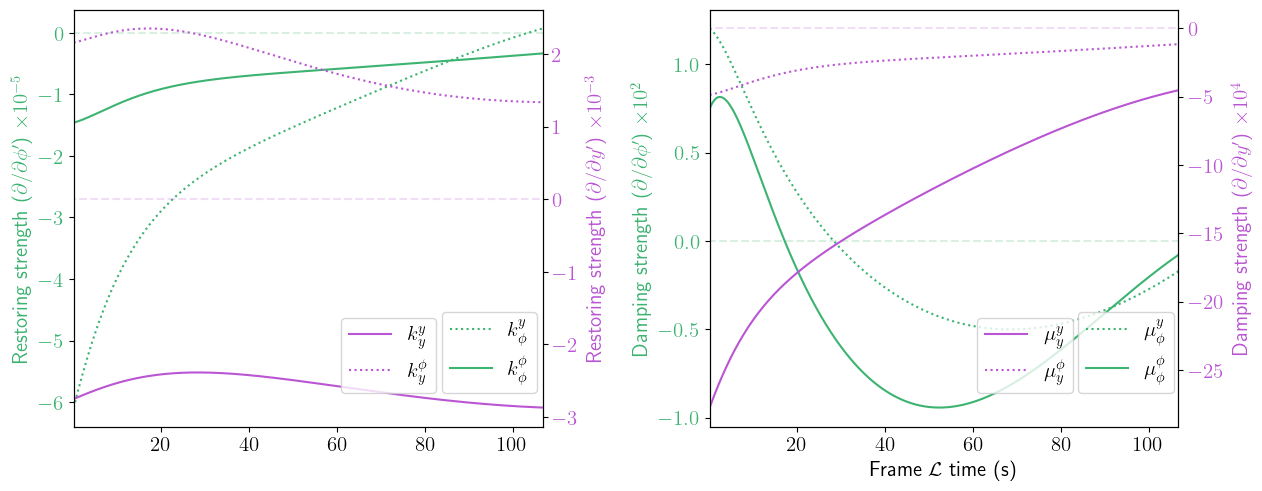

In [ ]:
## Combined
LabelSize = 15

################
## Restoring terms

fig,(ax, ax2) =plt.subplots(1,2,figsize=(15,5))

ax.plot(time_eigs,kyphi_trunc*1e-5,  label="$k^y_\phi$",color=colorvphi,linestyle="dotted")
ax.plot(time_eigs,kphiphi_trunc*1e-5,label="$k^\phi_\phi$",color=colorvphi)

ax2.set_xlabel(r"Frame $\mathcal{L}$ time (s)",fontsize=LabelSize)
ax.set_ylabel("Restoring strength ($\partial/\partial \phi'$) $\\times 10^{-5}$",fontsize=LabelSize,color=colorvphi)
ax.tick_params(labelsize=15)
ax.tick_params(axis='y',labelcolor=colorvphi)

t=ax.get_ylim()
X = ax.get_xlim()
ax.hlines(0,X[0],X[1],"k","dashed", color=colorvphi, alpha=0.2)

ax1=ax.twinx()

ax1.plot(time_eigs,kphiy_trunc*1e-3,  label="$k^\phi_y$",color=colorvY,linestyle="dotted")
ax1.plot(time_eigs,kyy_trunc*1e-3,    label="$k^y_y$",color=colorvY)

ax1.set_ylabel("Restoring strength ($\partial/\partial y'$)  $\\times 10^{-3}$",fontsize=LabelSize,color=colorvY)
ax1.tick_params(labelsize=15)
ax1.tick_params(axis='y',labelcolor=colorvY)

X = ax.get_xlim()
ax1.hlines(0,X[0],X[1],"k","dashed", color=colorvY, alpha=0.2)
ax.set_ylim(t)
ax.set_xlim(time_eigs[0],time_eigs[-1])

# ax.set_xticks([0,1,1.45,2,3,4,5])

handles, labels = ax.get_legend_handles_labels()
handles1, labels1 = ax1.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax.legend([handles[idx] for idx in order],[labels[idx] for idx in order],       loc=(0.57+0.215,0.08),fontsize=LabelSize)
ax1.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],  loc=(0.57,0.08),fontsize=LabelSize)

#time_eigs
betax = 100*v_trunc

################
## Damping
ax2.plot(time_eigs,muyphi_trunc*1e2,  label="$\mu^y_\phi$",color=colorvphi,linestyle="dotted")
ax2.plot(time_eigs,muphiphi_trunc*1e2,label="$\mu^\phi_\phi$",color=colorvphi)
ax2.set_xlabel(r"Frame $\mathcal{L}$ time (s)",fontsize=LabelSize)
ax2.set_ylabel("Damping strength ($\partial/\partial \phi'$) $\\times 10^{2}$",fontsize=LabelSize,color=colorvphi)
ax2.tick_params(labelsize=15)
ax2.tick_params(axis='y',labelcolor=colorvphi)

t2=ax2.get_ylim()
ax2b=ax2.twinx()
X = ax2.get_xlim()
ax2.hlines(0,X[0],X[1],"k","dashed", color=colorvphi, alpha=0.2)

ax2b.plot(time_eigs,muphiy_trunc*1e4,  label="$\mu^\phi_y$",color=colorvY,linestyle="dotted")
ax2b.plot(time_eigs,muyy_trunc*1e4,    label="$\mu^y_y$",color=colorvY)

ax2b.set_ylabel("Damping strength ($\partial/\partial y'$) $\\times 10^{4}$",fontsize=LabelSize,color=colorvY)
ax2b.tick_params(labelsize=15)
ax2b.tick_params(axis='y',labelcolor=colorvY)

X = ax2b.get_xlim()
ax2b.hlines(0,X[0],X[1],"k","dashed", color=colorvY, alpha=0.2)
ax2.set_ylim(t2)
ax2.set_xlim(time_eigs[0],time_eigs[-1])


handles, labels = ax2.get_legend_handles_labels()
handles1, labels1 = ax2b.get_legend_handles_labels()
order = [0,1]
order1=[1,0]
ax2.legend([handles[idx] for idx in order],[labels[idx] for idx in order],       loc=(0.57+0.215,0.08),fontsize=LabelSize)
ax2b.legend([handles1[idx] for idx in order1],[labels1[idx] for idx in order1],  loc=(0.57,0.08),fontsize=LabelSize)

set_size(10,4,ax)
fig.tight_layout()
dpi = 600
# plt.savefig(rf"./Integrators/Data/Ilic-10/Images/Jacobian_terms_damp_dynamics_dpi{dpi}.jpeg", format="jpeg", dpi=dpi, bbox_inches='tight')
# plt.close(fig)

`#################################################################################################`

## Linear model

In [218]:
I = 10e9; m=1/1000; c = 299792458
x0 = [data['Initial'][1], data['Initial'][2], data['Initial'][4], data['Initial'][5]]
grating.wavelength = 1 #1/D1_ND(4.8/100)
real, imag, P = grating.Eigs(I, m, c, grad_method="grad",check_det=False,return_vec=True)
P_inverse = np.linalg.inv(P)
# print("Re(eig):", real*1e4)
# print("Im(eig):", imag)
vec1 = P[:,0]; vec2 = P[:,1];       vec3 = P[:,2]; vec4 = P[:,3]

## Linear model
def X_linear(t,x0):
    """
    ## Inputs
    t: time (~in M~)
    x0: 1x4 array (~in M~)
    ## Outputs
    Time evolved solution (~in M~)
    """
    sum = 0
    for i in range(4):
        sum = sum + np.matmul(P_inverse, x0)[i] * np.exp(t*(real + 1j*imag))[i] * P[:,i]
    return np.real(sum)
def X_linear_arrays(t_array,x0):
    y = np.zeros(len(t_array))
    phi = np.zeros(len(t_array))
    vy = np.zeros(len(t_array))
    vphi = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear(t_array[i],x0)
        y[i] = X[0]
        phi[i] = X[1]
        vy[i] = X[2]
        vphi[i] = X[3]
    return y, phi, vy, vphi
## Envelope in case x0 = Re(vec)
def X_linear_conj(t, real, imag, vec):
    # return 2 * np.exp(real*t)*( np.cos(imag*t)*np.real(vec) - np.sin(imag*t)*np.imag(vec) )
    return 2 * np.exp(real*t)*( np.abs(np.real(vec)) + np.abs(np.imag(vec)) )
def X_linear_conj_arrays(t_array,real, imag, vec):
    y_lin_conj = np.zeros(len(t_array))
    phi_lin_conj = np.zeros(len(t_array))
    vy_lin_conj = np.zeros(len(t_array))
    vphi_lin_conj = np.zeros(len(t_array))
    for i in range(len(t_array)):
        X = X_linear_conj(t_array[i],real, imag, vec)
        y_lin_conj[i] = X[0]
        phi_lin_conj[i] = X[1]
        vy_lin_conj[i] = X[2]
        vphi_lin_conj[i] = X[3]
    return y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj

# t_array = np.linspace(0,100,10000) 
t_array = np.linspace(timeL_trunc[0],timeL_trunc[-1],10000)

# x0 = np.array( [-(5/100)*L, 0, 1, 0] )
# x0 = np.real(vec1 + vec2)
# x0 = np.real(vec3 + vec4)

## Linear model
y_lin, phi_lin, vy_lin, vphi_lin = X_linear_arrays(t_array,x0)
## Enevelope in case
y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj = X_linear_conj_arrays(t_array, real[0], imag[0], vec1)
# y_lin_conj, phi_lin_conj, vy_lin_conj, vphi_lin_conj = X_linear_conj_arrays(t_array, real[2], imag[2], vec3)
Envelope = True

In [120]:
print("Re(eig)",real[2])
print("vec: ", 2*np.real(vec3))

Re(eig) -0.0003064680675418166
vec:  [ 3.59070417e-07  2.97889776e-08 -1.99908332e+00 -3.63719137e-02]


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Frame L time
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############
ax2a.plot(t_array, (y_lin/L)*100, color=colorY)
ax2b.plot(t_array, vy_lin, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array, (180/np.pi)*phi_lin, color=colorphi)
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color=colorvphi)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black') 
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black') 
    ax2b.plot(t_array, vy_lin_conj, color='black') 
    ax2b.plot(t_array, -vy_lin_conj, color='black') 
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x bounds
ax2a.set_xlim(0,t_array[-1])
ax2b.set_xlim(0,t_array[-1])
ax3a.set_xlim(0,t_array[-1])
ax3b.set_xlim(0,t_array[-1])

if Envelope:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.2E}, {x0[1]:.2E}, {x0[2]:.2E}, {x0[3]:.2E}]")
else:
    fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


In [ ]:
## Normalised time
t_factor = np.sqrt((m*c)/I)
fig, ( (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=2, ncols=3, width_ratios=(1,0.05,1), figsize=(15,10))
dummy2.axis('off')
dummy3.axis('off')

############

############
ax2a.plot(t_array/t_factor, (y_lin/L)*100, color=colorY)
ax2a.set_xlim(0,t_array[-1]/t_factor)
ax2b.plot(t_array/t_factor, vy_lin, color=colorvY)
ax2b.set_xlim(0,t_array[-1]/t_factor)
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Normalised frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time $(\sqrt{mc/I})$", ylabel="$v_y$ (m/s)")

############
ax3a.plot(t_array/t_factor, (180/np.pi)*phi_lin, color=colorphi)
ax3a.set_xlim(0,t_array[-1]/t_factor)
ax3b.plot(t_array/t_factor, (0.5/np.pi)*vphi_lin, color=colorvphi)
ax3b.set_xlim(0,t_array[-1]/t_factor)
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time $(\sqrt{mc/I})$", ylabel="$\dot{\phi}'$ (rps)")

fig.suptitle(rf"LINEAR: {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0[0]:.4f}, {x0[1]:.4f}, {x0[2]:.4f}, {x0[3]:.4f}]")


## Overlaid

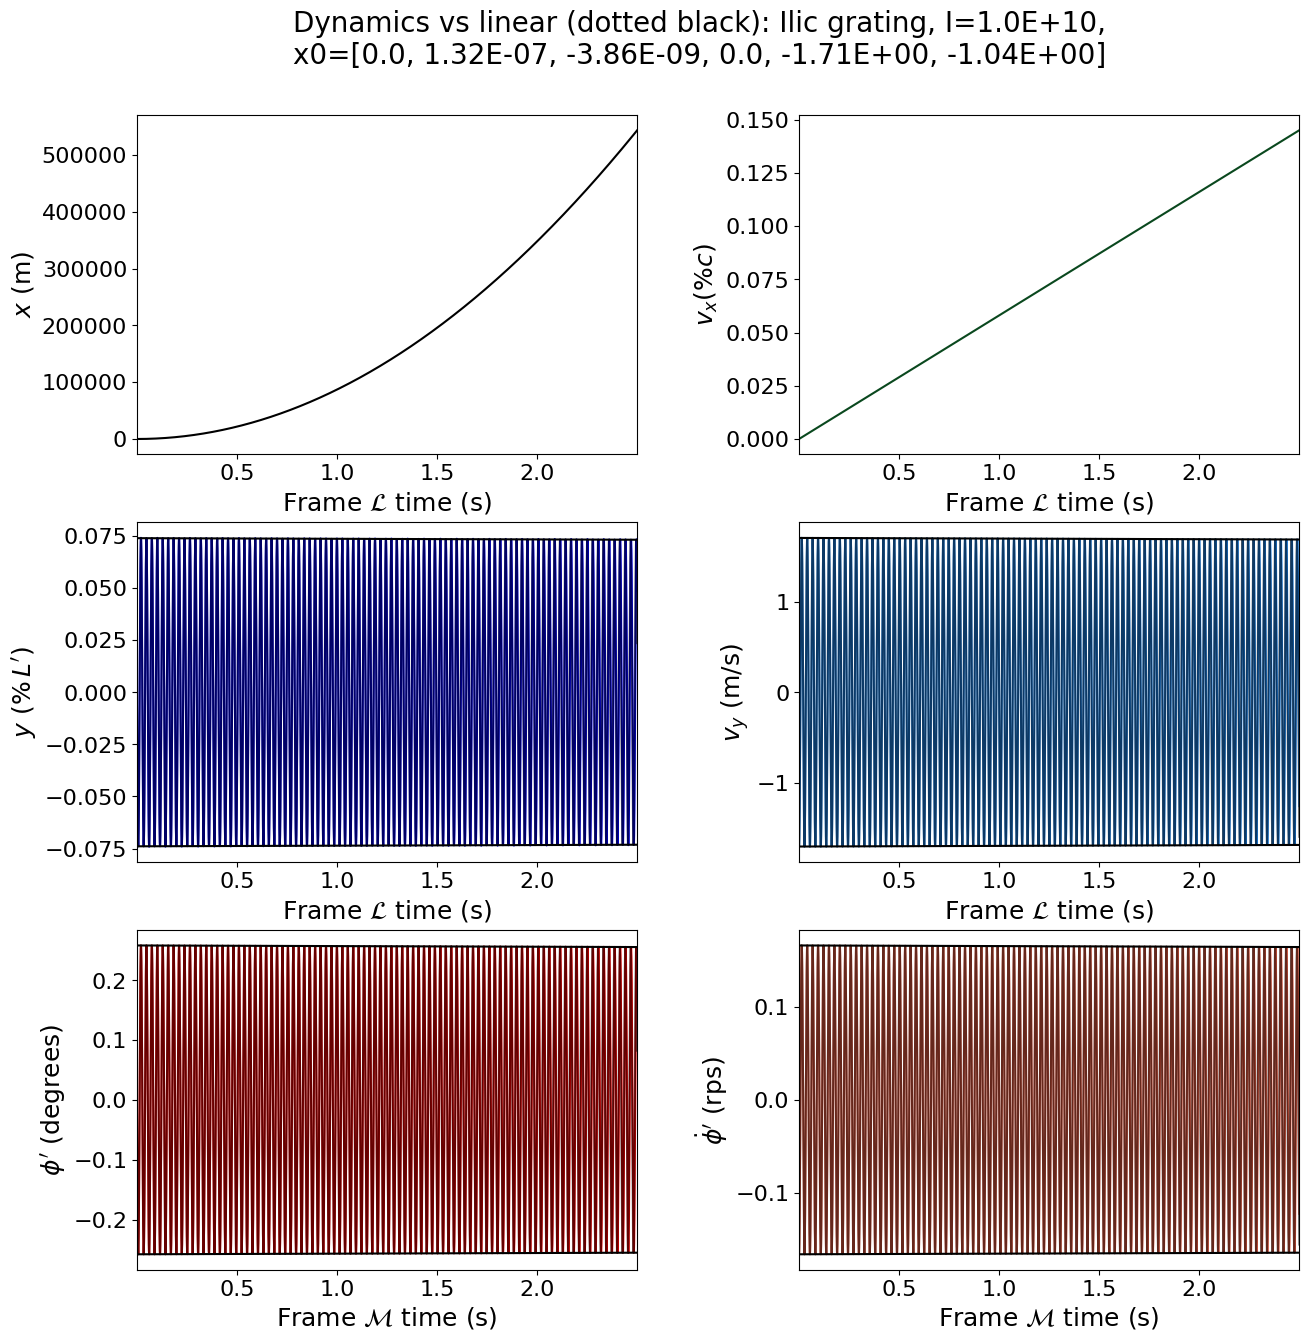

In [219]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')

fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1b.set_xlim(timeL_trunc[0],timeL_trunc[-1])

ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax2b.plot(timeL, np.gradient(y,timeL), color="red", linestyle="dotted")
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

## Linear
ax2a.plot(t_array, (y_lin/L)*100, color='black', alpha=0.6)
ax2b.plot(t_array, vy_lin, color='black', alpha=0.6)

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3a.set_xlim(timeL_trunc[0],timeL_trunc[-1])
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3b.set_xlim(timeL_trunc[0],timeL_trunc[-1])
# ax3b.plot(timeM, np.gradient(phiM,timeM), color="red", linestyle="dotted")
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Linear
ax3a.plot(t_array, (180/np.pi)*phi_lin, color='black', alpha=0.6)
ax3a.set_xlim(t_array[0],t_array[-1])
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin, color='black', alpha=0.6)
ax3b.set_xlim(t_array[0],t_array[-1])

## Envelope
if Envelope:
    ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
    ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
    ax2b.plot(t_array, vy_lin_conj, color='black')
    ax2b.plot(t_array, -vy_lin_conj, color='black')
    ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
    ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
    ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
    ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## Overlaid - eigenvector conditions

(0.0, 51.12602299084513)

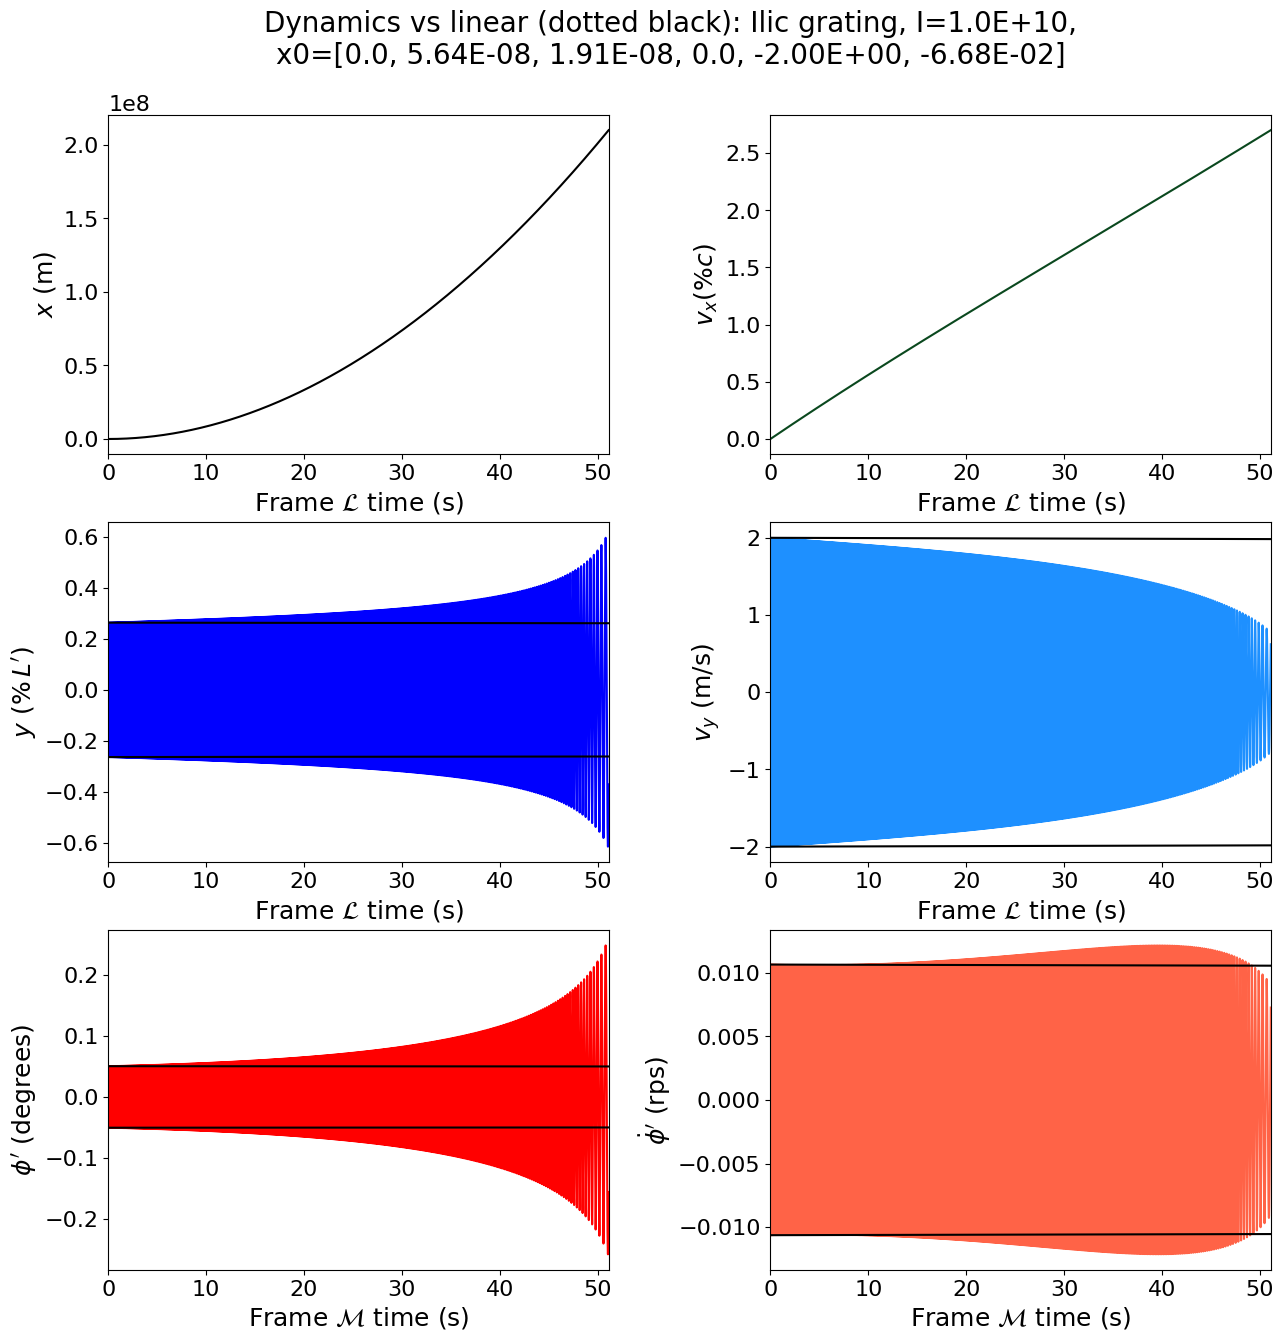

In [94]:
fig, ( (ax1a, dummy, ax1b), (ax2a, dummy2, ax2b), (ax3a, dummy3, ax3b)) = plt.subplots(nrows=3, ncols=3, width_ratios=(1,0.05,1), figsize=(15,15))
dummy.axis('off')
dummy2.axis('off')
dummy3.axis('off')
fig.suptitle(rf"Dynamics vs linear (dotted black): {grating_type} grating, I={I:.1E}," "\n" rf"x0=[{x0_dyn[0]}, {x0_dyn[1]:.2E}, {x0_dyn[2]:.2E}, {x0_dyn[3]}, {x0_dyn[4]:.2E}, {x0_dyn[5]:.2E}]",
             y=0.95)

############
ax1a.plot(timeL_trunc, x_trunc, color=colorX)
ax1b.plot(timeL_trunc, 100*vx_trunc/c, color=colorvX)
ax1a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$x$ (m)")
ax1b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_x (\% c)$")

############
ax2a.plot(timeL_trunc, (y_trunc/L)*100, color=colorY)
ax2b.plot(timeL_trunc, vy_trunc, color=colorvY)
ax2a.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$y~(\%\,L')$")
ax2b.set(xlabel="Frame $\mathcal{L}$ time (s)", ylabel="$v_y$ (m/s)")

############
ax3a.plot(timeM_trunc, (180/np.pi)*phiM_trunc, color=colorphi)
ax3b.plot(timeM_trunc, (0.5/np.pi)*phidotM_trunc, color=colorvphi)
ax3a.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\phi'$ (degrees)")
ax3b.set(xlabel="Frame $\mathcal{M}$ time (s)", ylabel="$\dot{\phi}'$ (rps)")

## Envelope
ax2a.plot(t_array, (y_lin_conj/L)*100, color='black')
ax2a.plot(t_array, -(y_lin_conj/L)*100, color='black')
ax2b.plot(t_array, vy_lin_conj, color='black')
ax2b.plot(t_array, -vy_lin_conj, color='black')
ax3a.plot(t_array, (180/np.pi)*phi_lin_conj, color='black')
ax3a.plot(t_array, -(180/np.pi)*phi_lin_conj, color='black')
ax3b.plot(t_array, (0.5/np.pi)*vphi_lin_conj, color='black')
ax3b.plot(t_array, -(0.5/np.pi)*vphi_lin_conj, color='black')

## x-bounds
ax1a.set_xlim(0,timeL_trunc[-1])
ax1b.set_xlim(0,timeL_trunc[-1])
ax2a.set_xlim(0,timeL_trunc[-1])
ax2b.set_xlim(0,timeL_trunc[-1])
ax3a.set_xlim(0,timeL_trunc[-1])
ax3b.set_xlim(0,timeL_trunc[-1])